In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from typing import List

In [41]:
np.linspace(0,10, 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [30]:
np.sin(np.linspace(0,10, 20)*(2*np.pi/10))

array([ 0.00000000e+00,  3.24699469e-01,  6.14212713e-01,  8.37166478e-01,
        9.69400266e-01,  9.96584493e-01,  9.15773327e-01,  7.35723911e-01,
        4.75947393e-01,  1.64594590e-01, -1.64594590e-01, -4.75947393e-01,
       -7.35723911e-01, -9.15773327e-01, -9.96584493e-01, -9.69400266e-01,
       -8.37166478e-01, -6.14212713e-01, -3.24699469e-01, -2.44929360e-16])

In [53]:
(datetime.strptime("2021-01-01", "%Y-%m-%d") - datetime.strptime("2021-01-31", "%Y-%m-%d")).days

-30

In [55]:
def add_seasonality(start_date, end_date, periodicity, freq='D'):
    """
    Function that creates a sinusoidal time series

    Parameters
    ------------
    start_date (datetime):
        The start_date for the series
    end_date (datetime):
        The end date for the series
    periodicity (float):
        The desired cycle length
    freq (str) = 'D':
        The freq for generating the datetime series

    Returns
    ------------
    A pd.series.Series object with a series of specified periodicity
    """
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    date_series = pd.date_range(start = start_date, end=end_date, freq=freq)
    series_len = len(date_series)
    x = np.linspace(0, series_len, series_len)
    y = np.sin(x* (2*np.pi/periodicity))

    date_series = pd.Series(data=y, index = date_series)

    return date_series


In [60]:
t = add_seasonality(start_date="2021-01-01", end_date='2022-03-31', periodicity=(365.254))

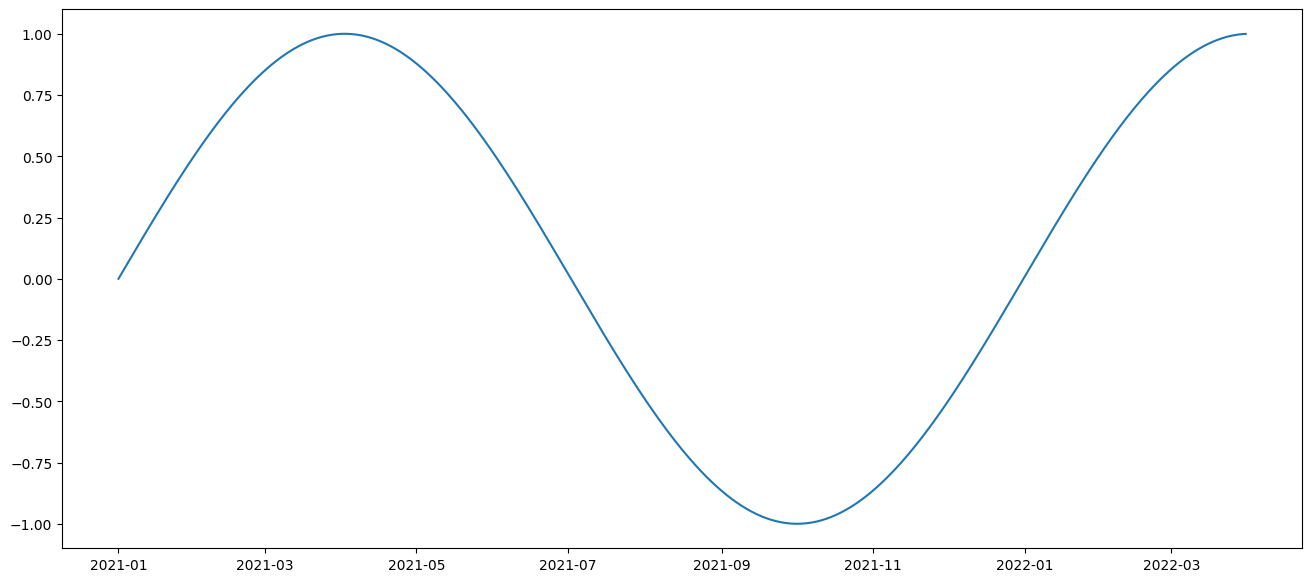

In [61]:
plt.figure(figsize=(16,7))
plt.plot(t)

In [172]:
## Function for generating the sales data

def generate_sales_data(start_date:str, end_date:str,
 mean_sales:float, error_sd:float, seasonality:List[str],
 trend:float = 0.0, freq = 'D'):

    """
    A function which generates an additive sales data model with the given mean, trend, variance and seasonality 
    within the specified period.

    Parameters
    -------------
    start_date (str):
        The start date for the sequence
    end_date (str):
        End date
    mean_sales (float):
    errosr_sd (float):
    seasonality (List[str]):
        A list of desired seasonality. Should be from the list ['weekly', 'monthly', 'annually']
    trend (float) = 0.0:
        The total increase from the mean towards the end of the series
    freq (str) = 'D':
        The freq for creating the dataset
    """
    days_in_yr = 365.2422

    seasonal_dict = {'weekly':(days_in_yr/52), 'monthly':(days_in_yr/12), 'yearly':(days_in_yr)}
    date_series = pd.date_range(start = start_date, end=end_date, freq=freq)
    trend = np.linspace(0, trend, len(date_series))

    sales_cyclicity = np.zeros(len(date_series), dtype=np.float64)

    for item in seasonality:
        sales_cyclicity = np.sum([sales_cyclicity, add_seasonality(start_date=start_date, end_date=end_date, periodicity=seasonal_dict[item], freq = freq)], axis=0)


    output = mean_sales + trend + sales_cyclicity + np.random.normal(loc = 0, scale=error_sd, size=len(date_series)) 
    output_pd_series = pd.Series(output, index = date_series, dtype=float)

    return output_pd_series



In [186]:
t = generate_sales_data(start_date='2021-01-01', end_date='2022-03-31', mean_sales=1000.0, trend = 5.0, error_sd=0.0, seasonality=['monthly', 'yearly'])

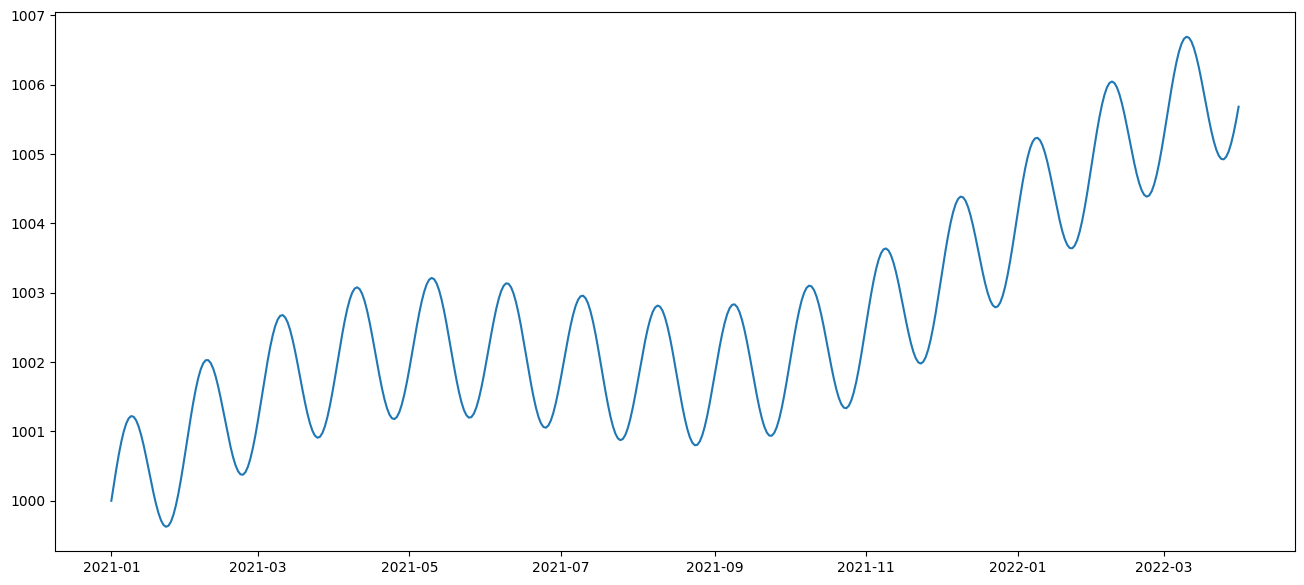

In [187]:
plt.figure(figsize=(16,7))
plt.plot(t)

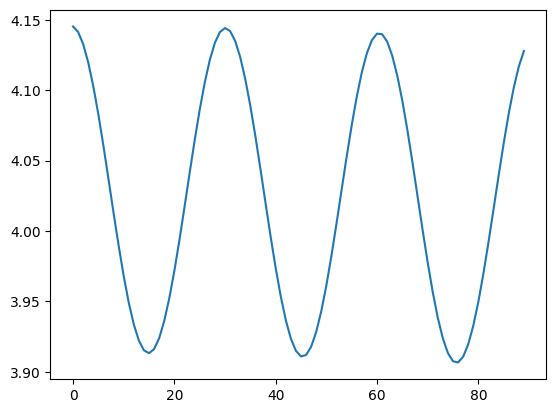

In [188]:
plt.plot(np.array(t['2022-01-01':'2022-03-31']) - np.array(t['2021-01-01':'2021-03-31']))